In [3]:
import numpy as np
from matplotlib import pyplot as plt
from tools import cdffit, pdffit

### Generate a random sample

In [4]:
x = np.random.normal(size=2000)

(array([0.01471975, 0.02698621, 0.10140274, 0.24205816, 0.36145171,
        0.36390501, 0.29194177, 0.15046859, 0.06051454, 0.02207963]),
 array([-3.17918807, -2.56776477, -1.95634147, -1.34491817, -0.73349487,
        -0.12207157,  0.48935174,  1.10077504,  1.71219834,  2.32362164,
         2.93504494]),
 <BarContainer object of 10 artists>)

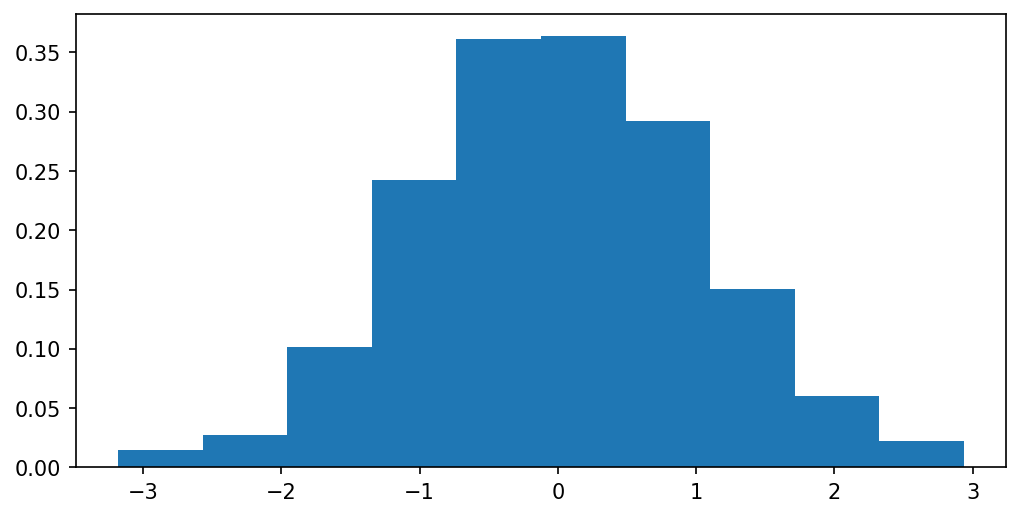

In [19]:
fig = plt.figure(dpi=150, figsize=(8, 4))
ax = fig.add_subplot()
ax.hist(x, density=True)

### Visualize the Histograms, ECDF, pECDF

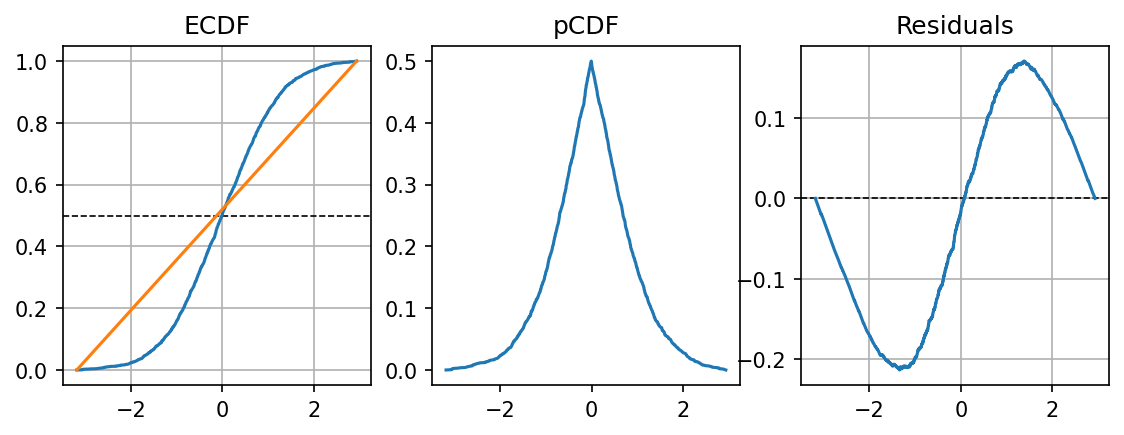

In [21]:
x.sort()
y = np.linspace(0, 1, len(x))
ref = (x-x.min())/(x.max()-x.min())
res = y - ref
pcdf = y.copy()
pcdf[y>0.5] = 1 - pcdf[y>0.5]


fig = plt.figure(dpi=150, figsize=(9, 3))
ax = fig.add_subplot(131)
ax.grid()
ax.set_title('ECDF')
ax.axhline(0.5, linestyle='--', color='k', linewidth=.8)
ax.plot(x, y)
ax.plot(x, ref)

ax = fig.add_subplot(132)
ax.plot(x, pcdf)
ax.set_title('pCDF')

ax = fig.add_subplot(133)
ax.grid()
ax.set_title('Residuals')
ax.axhline(0., linestyle='--', color='k', linewidth=.8)
ax.plot(x, res)

### Function basis

Text(0.5, 1.0, 'basis functions')

<Figure size 1350x450 with 0 Axes>

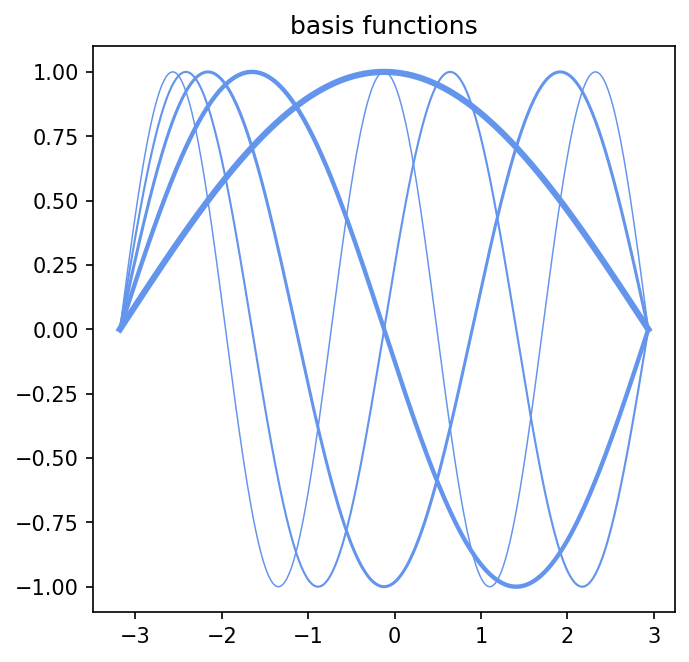

In [27]:
fig = plt.figure(dpi=150, figsize=(9, 3))
t = np.linspace(min(x), max(x), 500)
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
f = np.pi / (max(x)-min(x))
n = 5
lwd = 3
for i in range(1, n+1):
    ax.plot(t, np.sin(f*i*(t-x.min())), linewidth=lwd, color='cornflowerblue')
    lwd = lwd*0.7
ax.set_title('basis functions')

### FIT

Text(0.5, 1.0, 'Fourier fit')

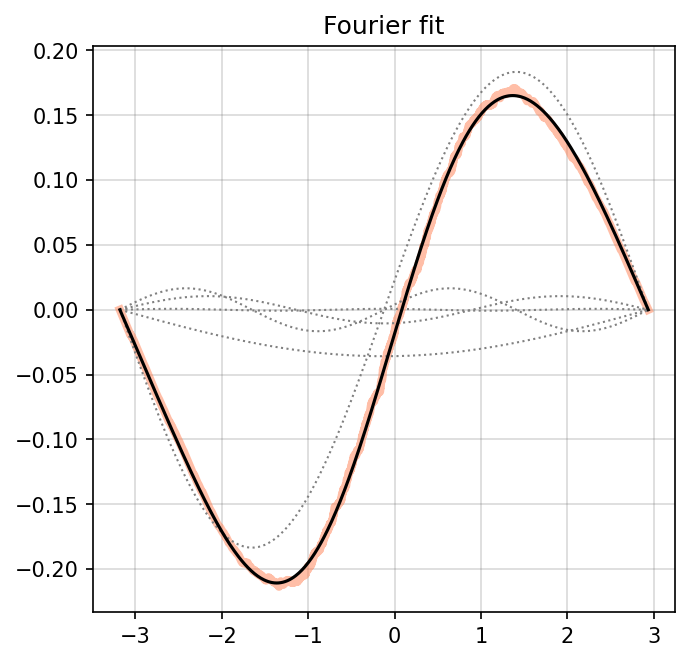

In [30]:
t = np.linspace(min(x), max(x), 500)

fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(x, res, linewidth=4, alpha=0.5, color='coral')

cols = []
f = np.pi / (max(x)-min(x))
for i in range(1, n+1):
    cols.append(np.sin(f*i*(x-min(x))))
M = np.column_stack(cols)
A = M.transpose()
pars = np.linalg.solve(A@M, A@res)

model = np.repeat(0, len(t))
for i, a in enumerate(pars):
    #mi = a*np.sin(f*(i+1)*(x-min(x)))
    mit = a*np.sin(f*(i+1)*(t-min(t)))
    ax.plot(t, mit, color='grey', linewidth=1, linestyle=':')
    model = model + mit

ax.plot(t, model, color='k', label='fit')
ax.grid(linewidth='0.2', color='dimgrey')
ax.set_title('Fourier fit')

Text(0.5, 1.0, 'Fourier fit')

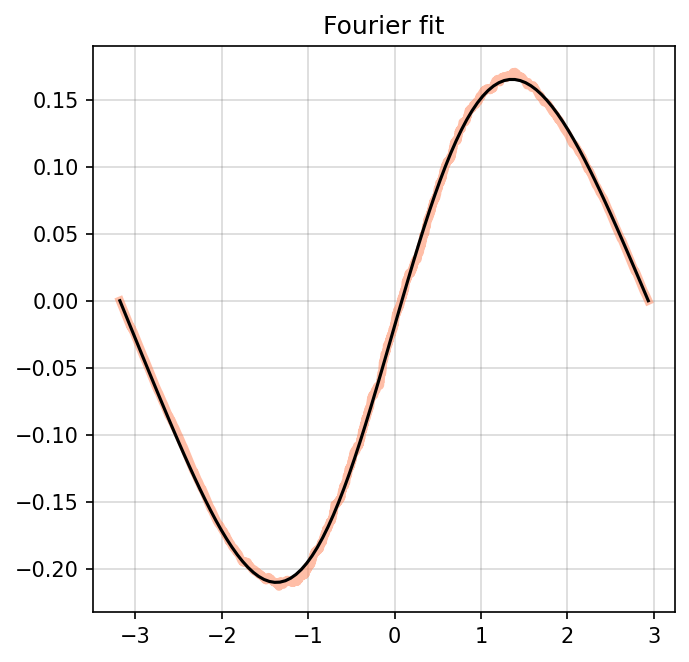

In [ ]:
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()

ax.plot(x, res, linewidth=4, alpha=0.5, color='coral')
model = cdffit(x, 4, 100)
t = np.linspace(min(x), max(x), 100)
ax.plot(t, model, color='k', label='fit')
ax.grid(linewidth='0.2', color='dimgrey')
ax.set_title('Fourier fit')

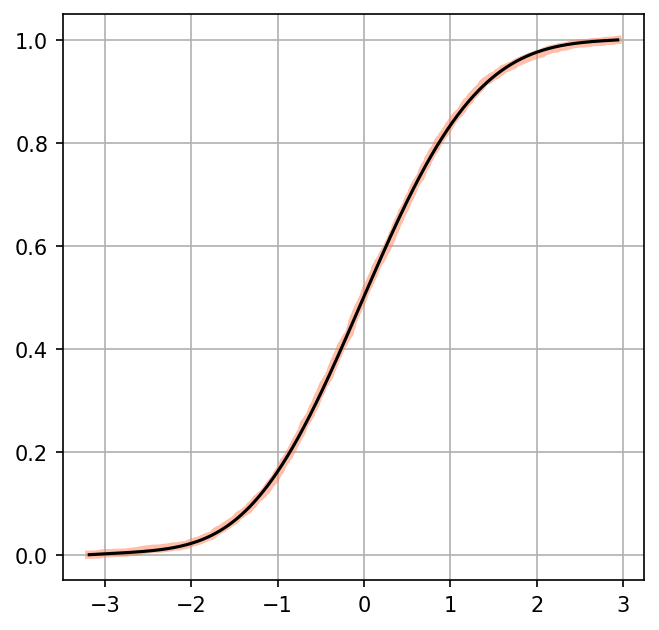

In [31]:
fig = plt.figure(dpi=150, figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(x, y, linewidth=4, alpha=0.5, color='coral')
md = model + (t-min(x))/(max(x)-min(x))
ax.plot(t, md, color='k', label='fit')
ax.grid()

### Model for PDF

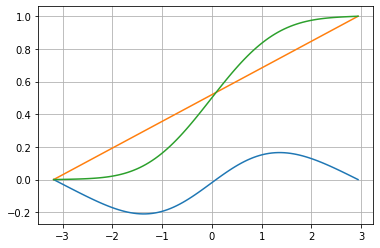

In [46]:
Nt = 100
t = np.linspace(min(x), max(x), Nt)
model_res = cdffit(x, 4, Nt)
model_cdf = model_res + (t-min(x))/(max(x)-min(x))

plt.plot(t, model_res)
plt.plot(t, (t-min(x))/(max(x)-min(x)))
plt.plot(t, model_cdf)
plt.grid()

In [47]:
fx, fy = pdffit(x, 4, 100)

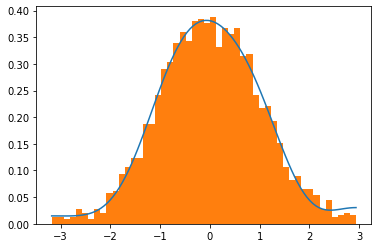

In [48]:
plt.plot(fx, fy)
h = plt.hist(x, density=True, bins=50)